In [1]:
import numpy as np
import debugger as db
import math
import matplotlib.pyplot as plt
import qho_functions as qho

from scipy.linalg import eigh

In [ ]:
def boundary_conditions(K, N, dx, order):
  # Constants
  hbar = 1.0  # Reduced Planck constant (set to 1 in atomic units)
  m = 1.0     # Mass of the particle (set to 1 in atomic units)
  
  if order == 2:
    K[1, 0] = K[0, 1] = -2 * hbar**2 / (3 * m * dx**2)
    K[1, 2] = K[N-2, N-3] = -2 * hbar**2 / (3 * m * dx**2)
    K[N-2, N-1] = K[N-1, N-2] = -2 * hbar**2 / (3 * m * dx**2)
     
  elif order == 4:
    K[1, 0] = K[0, 1] = -2 * hbar**2 / (3 * m * dx**2)
    K[1, 2] = K[N-2, N-3] = -2 * hbar**2 / (3 * m * dx**2)
    K[1, 3] = K[N-2, N-4] = hbar**2 / (24 * m * dx**2)
    K[0, 2] = K[N-1, N-3] = hbar**2 / (24 * m * dx**2)
      
  elif order == 6:
    K[0, 1] = -3 * hbar**2 / (4 * m * dx**2)
    K[0, 2] = 3 * hbar**2 / (40 * m * dx**2)
    K[0, 3] = -hbar**2 / (120 * m * dx**2)
    
    K[1, 0] = -3 * hbar**2 / (4 * m * dx**2)
    K[1, 2] = -3 * hbar**2 / (4 * m * dx**2)
    K[1, 3] = 3 * hbar**2 / (40 * m * dx**2)
    K[1, 4] = -hbar**2 / (120 * m * dx**2)
    
    K[2, 0] = 3 * hbar**2 / (40 * m * dx**2)
    K[2, 1] = -3 * hbar**2 / (4 * m * dx**2)
    K[2, 3] = -3 * hbar**2 / (4 * m * dx**2)
    K[2, 4] = 3 * hbar**2 / (40 * m * dx**2)
    K[2, 5] = -hbar**2 / (120 * m * dx**2)
    
    K[N-3, N-6] = -hbar**2 / (120 * m * dx**2)
    K[N-3, N-5] = 3 * hbar**2 / (40 * m * dx**2)
    K[N-3, N-4] = -3 * hbar**2 / (4 * m * dx**2)
    K[N-3, N-2] = -3 * hbar**2 / (4 * m * dx**2)
    K[N-3, N-1] = 3 * hbar**2 / (40 * m * dx**2)
    
    K[N-2, N-5] = -hbar**2 / (120 * m * dx**2)
    K[N-2, N-4] = 3 * hbar**2 / (40 * m * dx**2)
    K[N-2, N-3] = -3 * hbar**2 / (4 * m * dx**2)
    K[N-2, N-1] = -3 * hbar**2 / (4 * m * dx**2)
    
    K[N-1, N-4] = -hbar**2 / (120 * m * dx**2)
    K[N-1, N-3] = 3 * hbar**2 / (40 * m * dx**2)
    K[N-1, N-2] = -3 * hbar**2 / (4 * m * dx**2)
    
  return K

In [ ]:
def harmonic_oscillator_spectrum(omega, L, N=1000, order=2):
  # Constants
  hbar = 1.0  # Reduced Planck constant (set to 1 in atomic units)
  m = 1.0     # Mass of the particle (set to 1 in atomic units)
  
  # Discretization
  x = np.linspace(-L, L, N)
  dx = x[1] - x[0]

  # Construct the Hamiltonian matrix
  N = N
  K = np.zeros((N, N))
  V = np.zeros((N, N))
  H = np.zeros((N, N))
  
  K = boundary_conditions(K, N, dx, order)
  
  if order == 2:    
    for i in range(1, N-1):
      K[i, i-1] = -hbar**2 / (2 * m * dx**2)
      K[i, i+1] = -hbar**2 / (2 * m * dx**2)
      
    for i in range(N):
      K[i, i] = hbar**2 / (m * dx**2)

    
  elif order == 4:
    for i in range(2, N-2):
      K[i, i-2] = hbar**2 / (24 * m * dx**2)
      K[i, i-1] = -2 * hbar**2 / (3 * m * dx**2)
      K[i, i+1] = -2 * hbar**2 / (3 * m * dx**2)
      K[i, i+2] = hbar**2 / (24 * m * dx**2)
    
    for i in range(N):
      K[i, i] = 5 * hbar**2 / (4 * m * dx**2)
      
    
  elif order == 6:
    
    for i in range(3, N-3):
      K[i, i-3] = -hbar**2 / (120 * m * dx**2)
      K[i, i-2] = 3 * hbar**2 / (40 * m * dx**2)
      K[i, i-1] = -3 * hbar**2 / (4 * m * dx**2)
      K[i, i+1] = -3 * hbar**2 / (4 * m * dx**2)
      K[i, i+2] = 3 * hbar**2 / (40 * m * dx**2)
      K[i, i+3] = -hbar**2 / (120 * m * dx**2)
    
    for i in range(N):
      K[i, i] = 49 * hbar**2 / (36* m * dx**2)
        
  else:
    raise ValueError("Unsupported order. Please choose order = 2, 4 or 6.")
    
  V_diag = 0.5 * m * omega**2 * x**2
  V = np.diag(V_diag)

  H = K + V

  energies, psi = eigh(H)
  norm = np.sqrt(np.sum(np.abs(psi)**2, axis=0))
  for i in range(len(energies)):
    psi[:, i] = psi[:, i] / norm
    
  center_index = N // 2  # assuming symmetric grid centered around x = 0

  for i in range(len(psi)):
    if i % 2 == 0:  # Even states
      # Ensure the wavefunction is positive at the center
      if ((i//2)%2==0 and psi[:, i][center_index] < 0) or ((i//2)%2!=0 and psi[:, i][center_index] > 0):
        psi[:, i] *= -1
    else:  # Odd states
      # Find the first peak after the center and make it positive
      first_peak_index = center_index + np.argmax(np.abs(psi[i][center_index:]))
      if psi[:, i][first_peak_index] < 0:
        psi[:, i] *= -1
    
  return energies, psi.T

In [105]:
omega = 1.0 # Angular frequency
L = 5 # Range of x from -L to L
N = 1000  # Number of grid points
x = np.linspace(-L, L, N)

#energies_2, wfc_2 = harmonic_oscillator_spectrum(omega, L, N, order = 2)
#energies_4, wfc_4 = harmonic_oscillator_spectrum(omega, L, N, order = 4)
energies_6, wfc_6 = harmonic_oscillator_spectrum(omega, L, N, order = 6)

In [106]:
n = 10
#print(f'First {n} eigenvalues for second order approximation:\n {energies_2[:n]}')
#print(f'First {n} eigenvalues for fourth order approximation:\n {energies_4[:n]}')
print(f'First {n} eigenvalues for sixth order approximation:\n {energies_6[:n]}')

First 10 eigenvalues for sixth order approximation:
 [-54.9321538  -53.90746409 -52.88277962 -51.85809885 -50.83340771
 -49.80861109 -48.78322062 -47.75532011 -46.71921183 -45.66227612]


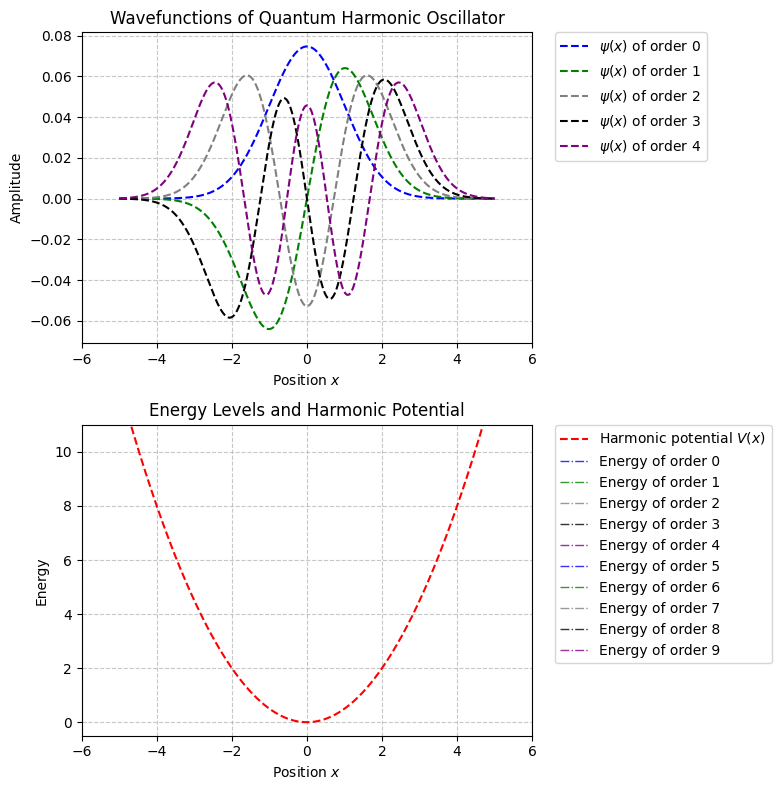

In [107]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
colors = ['blue', 'green', 'grey', 'black', 'purple', 'blue', 'green', 'grey', 'black', 'purple']

# Plot the wavefunctions in the first subplot
for n in range(5):
  #ax1.plot(x, wfc_2[n], label=f"$\psi(x)$ of order {n}", color=colors[n], linewidth=1.5)
  #ax1.plot(x, wfc_4[n], label=f"$\psi(x)$ of order {n}", color=colors[n], linewidth=1.5, linestyle="--")
  ax1.plot(x, wfc_6[n], label=f"$\psi(x)$ of order {n}", color=colors[n], linewidth=1.5, linestyle="--")

ax1.set_xlabel("Position $x$")
ax1.set_ylabel("Amplitude")
ax1.set_title("Wavefunctions of Quantum Harmonic Oscillator")
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
ax1.set_xlim(-L-1, L+1)

# Plot the potential and energy levels in the second subplot
ax2.plot(x, 0.5 * omega**2 * x**2, label="Harmonic potential $V(x)$", color="red", linestyle="--", linewidth=1.5)
for n in range(10):
  #ax2.axhline(energies_2[n], label=f"Energy of order {n}", color=colors[n], linestyle="-.", linewidth=1, alpha=0.8)
  #ax2.axhline(energies_4[n], label=f"Energy of order {n}", color=colors[n], linestyle="-.", linewidth=1, alpha=0.8)
  ax2.axhline(energies_6[n], label=f"Energy of order {n}", color=colors[n], linestyle="-.", linewidth=1, alpha=0.8)

ax2.set_xlabel("Position $x$")
ax2.set_ylabel("Energy")
ax2.set_title("Energy Levels and Harmonic Potential")
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
ax2.set_ylim(-0.5, 11)
ax2.set_xlim(-L-1, L+1)

fig.tight_layout()
plt.show()


# PROGRAM EVALUATION

### *Correctness*: comparison with analytical solution

In [54]:
L = 5
N = 1000
x = np.linspace(-L, L, N)
omega = 1

In [55]:
norm = np.sqrt(sum(np.abs(qho.harmonic_wfc(x, omega, n))**2))  # Integrate the square of the wavefunction
psi_normalized = qho.harmonic_wfc(x, omega, n) / norm

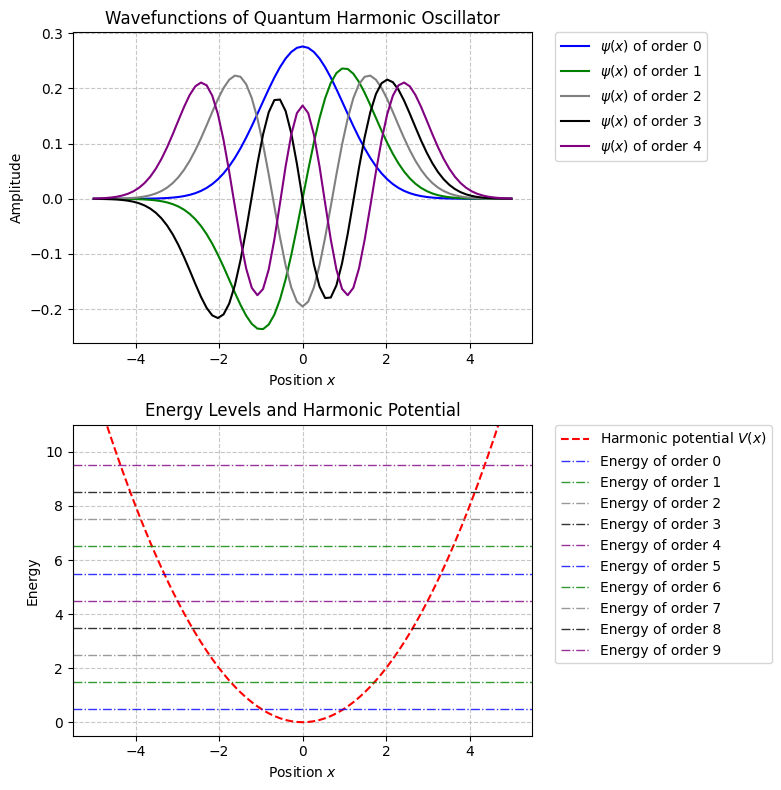

In [97]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
colors = ['blue', 'green', 'grey', 'black', 'purple', 'blue', 'green', 'grey', 'black', 'purple']

# Plot the wavefunctions in the first subplot
for n in range(5):
  norm = np.sqrt(sum(np.abs(qho.harmonic_wfc(x, omega, n))**2))
  ax1.plot(x, qho.harmonic_wfc(x, omega, n) / norm, label=f"$\psi(x)$ of order {n}", color=colors[n], linewidth=1.5)

ax1.set_xlabel("Position $x$")
ax1.set_ylabel("Amplitude")
ax1.set_title("Wavefunctions of Quantum Harmonic Oscillator")
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Plot the potential and energy levels in the second subplot
ax2.plot(x, 0.5 * omega**2 * x**2, label="Harmonic potential $V(x)$", color="red", linestyle="--", linewidth=1.5)
for n in range(10):
  ax2.axhline(qho.harmonic_en(omega, n), label=f"Energy of order {n}", color=colors[n], linestyle="-.", linewidth=1, alpha=0.8)

ax2.set_xlabel("Position $x$")
ax2.set_ylabel("Energy")
ax2.set_title("Energy Levels and Harmonic Potential")
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
ax2.set_ylim(-0.5, 11)

fig.tight_layout()
plt.show()